In [1]:
using DataFrames

In [2]:
using CSV

In [3]:
using Plots

In [53]:
df = CSV.read("dataset.csv")
df = select(df,Not(1,3,9,10,12,13)) # remove some columns

,Department,Interest in Programming,Interest in Data Base,Interest in Math/statistics
,String,String,String,String
1,Computer Science,YES,YES,YES
2,Computer Science,YES,YES,YES
3,Computer Science,YES,YES,No
4,Computer Science,YES,No,No
5,Informatics,YES,YES,YES
6,Computer Science,YES,YES,No
7,Computer Science,YES,YES,YES
8,Informatics,No,YES,No
9,Computer Science,No,YES,YES


In [54]:
dataset = convert(Matrix{Any},df)

47×8 Array{Any,2}:
 "Computer Science"  "YES"  "YES"  "YES"  "No"   …  "Programming 1"         
 "Computer Science"  "YES"  "YES"  "YES"  "YES"     "Artificial Inteligence"
 "Computer Science"  "YES"  "YES"  "No"   "YES"     "Data Structure"        
 "Computer Science"  "YES"  "No"   "No"   "No"      "Data Mining"           
 "Informatics"       "YES"  "YES"  "YES"  "YES"     "Database Fundamentals" 
 "Computer Science"  "YES"  "YES"  "No"   "YES"  …  "Advanced Programming"  
 "Computer Science"  "YES"  "YES"  "YES"  "YES"     "Data Mining"           
 "Informatics"       "No"   "YES"  "No"   "YES"     "Database Fundamentals" 
 "Computer Science"  "No"   "YES"  "YES"  "YES"     "Database Fundamentals" 
 "Informatics"       "YES"  "No"   "No"   "YES"     "Intro to C Network"    
 "Computer Science"  "YES"  "YES"  "No"   "YES"  …  "Programming 2"         
 "Informatics"       "No"   "YES"  "No"   "YES"     "Database Fundamentals" 
 "Computer Science"  "YES"  "YES"  "YES"  "YES"     "Data

In [55]:
# get the list of possible values
function pValues(column)
    values = []
    count = 0
    for c in column
        for v in values
            if(c == v)
                count = 1 + count
            end
        end
        if(count == 0)
            push!(values,c)
        end
        count = 0
    end
    return values
end

pValues (generic function with 1 method)

In [56]:

# change strings to number
function categoricalData(column,values)
    for c in 1:size(column,1)
        for i in 1:size(values,1)
            if(column[c] == values[i])
                column[c] = i
            end
        end
    end
    return column
end

categoricalData (generic function with 1 method)

In [57]:
# binary data
function binaryData(column)
    for i in 1:size(column,1)
        if(column[i] == "YES")
            column[i] = 1
        else
            column[i] = 0
        end
    end
    return column
end

binaryData (generic function with 1 method)

In [58]:
#dataset[:,1] = categoricalData(dataset[:,1],pValues(dataset[:,1]))
dataset[:,1] = categoricalData(dataset[:,1],pValues(dataset[:,1]))
dataset[:,2] = binaryData(dataset[:,2])
dataset[:,3] = binaryData(dataset[:,3])
dataset[:,4] = binaryData(dataset[:,4])
dataset[:,5] = binaryData(dataset[:,5])
dataset[:,6] = binaryData(dataset[:,6])
dataset[:,7] = categoricalData(dataset[:,7],pValues(dataset[:,7]))
print(pValues(dataset[:,8]))
dataset[:,8] = categoricalData(dataset[:,8],pValues(dataset[:,8]))


Any["Programming 1", "Artificial Inteligence", "Data Structure", "Data Mining", "Database Fundamentals", "Advanced Programming", "Intro to C Network", "Programming 2", "Web Dev Fundamentals", "IT System Security"]

47-element Array{Any,1}:
  1
  2
  3
  4
  5
  6
  4
  5
  5
  7
  8
  5
  4
  ⋮
  7
  3
  9
  5
  7
  9
  1
  2
  9
  2
  2
 10

In [59]:
i = size(dataset,1)
x = dataset[:,1:7]
x_train = x[1:trunc(Int,i * 0.8),:]
x_test = x[trunc(Int,i * 0.8)+1:i,:]

y = dataset[:,8]
y_train = y[1:trunc(Int,i * 0.8),:]
y_test = y[trunc(Int,i * 0.8)+1:i,:]

10×1 Array{Any,2}:
  9
  5
  7
  9
  1
  2
  9
  2
  2
 10

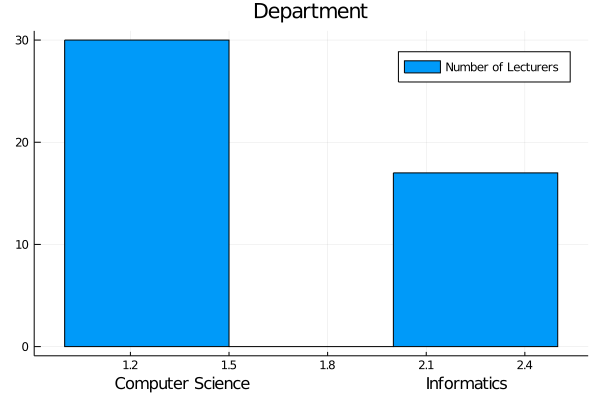

In [60]:
#using ScikitLearn.jl
#using Pkg
#ENV["PYTHON"] = ""
#Pkg.build("PyCall")
# testing graphs

#plot(x, y, title = "Two Lines", label = ["Line 1" "Line 2"], lw = 3)

#z = [1 2 3 4]
histogram(x[:,1],title="Department", label = "Number of Lecturers")
xlabel!("Computer Science                                  Informatics")
# computer science 29 info 17

In [61]:
using ScikitLearn

In [62]:
@sk_import linear_model: LogisticRegression

PyObject <class 'sklearn.linear_model._logistic.LogisticRegression'>

In [63]:
model = LogisticRegression(fit_intercept=true)

PyObject LogisticRegression()

In [64]:
#fit!(model,x_train,y_train)
fit!(model,x,y) # using the whole dataset

PyObject LogisticRegression()

In [65]:
accuracy = sum(predict(model, x) .== y) / length(y)
println(accuracy)

0.8085106382978723


In [66]:
tmp = [0,0,0,0,0,0,0]
predict(model,[x_test[2,:]])

1-element Array{Int64,1}:
 5

In [67]:
# Save the model
import JLD, PyCallJLD

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = __init__() at PyCallJLD.jl:12
└ @ PyCallJLD /home/carlos/.julia/packages/PyCallJLD/Tfc36/src/PyCallJLD.jl:12
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = __init__() at PyCallJLD.jl:13
└ @ PyCallJLD /home/carlos/.julia/packages/PyCallJLD/Tfc36/src/PyCallJLD.jl:13


In [68]:
JLD.save("CourseAllocation.jld", "model", model)
#model = JLD.load("CourseAllocation.jld", "model") # load the model back

In [69]:
model = JLD.load("CourseAllocation.jld", "model") 

PyObject LogisticRegression()